In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.0 MB/s 
     |████████████████████████████████| 188 kB 55.2 MB/s 
     |████████████████████████████████| 46 kB 2.7 MB/s 
     |████████████████████████████████| 1.2 MB 22.3 MB/s 
     |████████████████████████████████| 56 kB 3.2 MB/s 
     |████████████████████████████████| 51 kB 233 kB/s 
Mounted at /content/gdrive


In [ ]:
!pip install -q jmd_imagescraper

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
from jmd_imagescraper.core import * 
from pathlib import Path
from jmd_imagescraper.imagecleaner import *

In [ ]:
Path().cwd()/

Path('/content')

In [ ]:
im=PILImageBW.create(r'/content/bears/black/001_f80963d0.jpg')

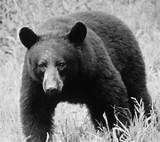

In [ ]:
im

In [ ]:
path = Path().cwd()/"bears"

In [ ]:
bear_types = 'grizzly','black','teddy'

In [ ]:
for types in bear_types:
  duckduckgo_search(path,types,types+' bear',max_results=150)

Duckduckgo search: grizzly bear


Duckduckgo search: black bear


Duckduckgo search: teddy bear


In [ ]:
path

Path('/content/bears')

In [ ]:
fns=get_image_files(path)
fns

(#450) [Path('/content/bears/black/028_2c245b55.jpg'),Path('/content/bears/black/090_d72c530f.jpg'),Path('/content/bears/black/039_cbe17d0a.jpg'),Path('/content/bears/black/137_a50ed47c.jpg'),Path('/content/bears/black/068_eb59d3b0.jpg'),Path('/content/bears/black/084_157541c3.jpg'),Path('/content/bears/black/082_2a1bea78.jpg'),Path('/content/bears/black/127_3bb5f4ef.jpg'),Path('/content/bears/black/071_4b3d03da.jpg'),Path('/content/bears/black/108_b0edc701.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink);

In [ ]:
bears_datablock=DataBlock(blocks=(ImageBlock,CategoryBlock),
                          get_items=get_image_files,
                          splitter=RandomSplitter(valid_pct=0.2,seed=21),
                          get_y=parent_label,
                          item_tfms=Resize(128))

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


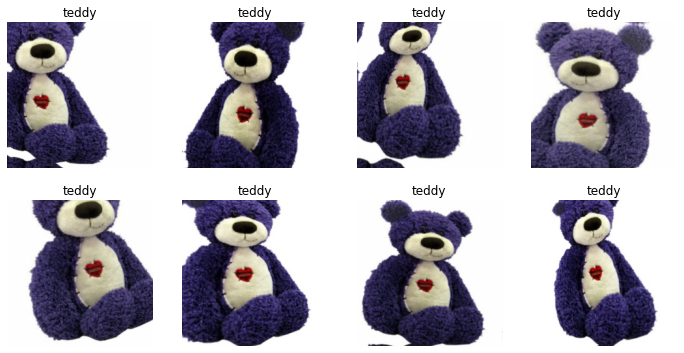

In [ ]:
bears_datablock = bears_datablock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = bears_datablock.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
learn=cnn_learner(dls,resnet18,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.431268,0.553281,0.166667,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.381463,0.313695,0.100000,00:05
1,0.289889,0.119574,0.055556,00:05
2,0.233128,0.066195,0.044444,00:05
3,0.190555,0.058405,0.033333,00:05


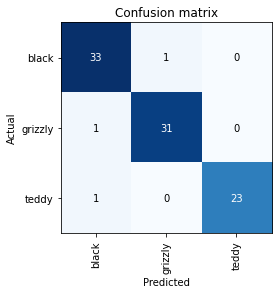

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

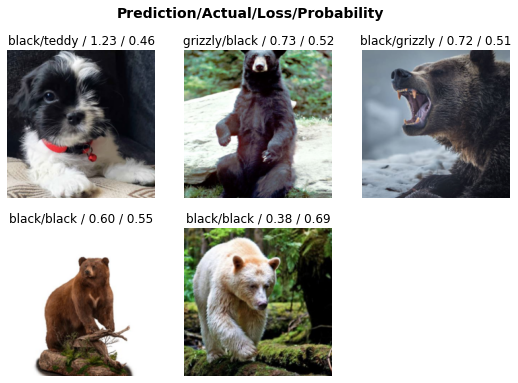

In [ ]:
interp.plot_top_losses(5)

In [ ]:
bears_datablock=DataBlock(blocks=(ImageBlock,CategoryBlock),
                          get_items=get_image_files,
                          splitter=RandomSplitter(valid_pct=0.2,seed=21),
                          get_y=parent_label,
                          item_tfms=Resize(128))

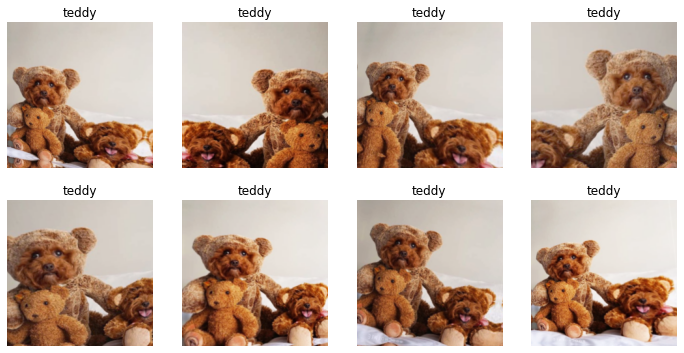

In [ ]:
bears_datablock = bears_datablock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = bears_datablock.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
learn=cnn_learner(dls,resnet18,metrics=error_rate)

In [ ]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.348719,0.590580,0.238636,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.208306,0.118478,0.056818,00:05
1,0.186541,0.044532,0.022727,00:05
2,0.140796,0.032482,0.011364,00:05
3,0.106965,0.041608,0.011364,00:05


In [ ]:
cleaner=ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]),path/cat)

In [ ]:
bears_datablock=DataBlock(blocks=(ImageBlock,CategoryBlock),
                          get_items=get_image_files,
                          splitter=RandomSplitter(valid_pct=0.2,seed=21),
                          get_y=parent_label,
                          item_tfms=Resize(128))

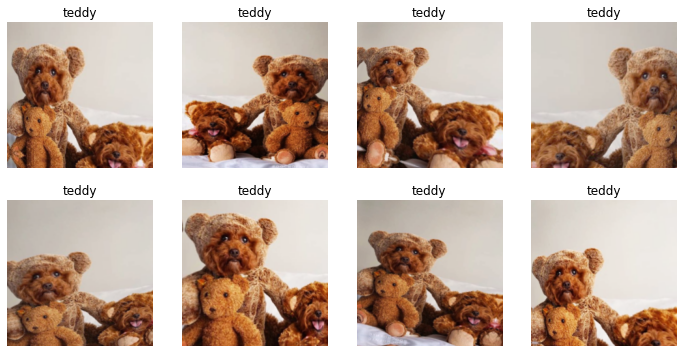

In [ ]:
bears_datablock = bears_datablock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = bears_datablock.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
learn=cnn_learner(dls,resnet18,metrics=error_rate)

In [ ]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.492048,0.407597,0.193182,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.216668,0.106618,0.045455,00:05
1,0.166676,0.100449,0.045455,00:05
2,0.132216,0.058514,0.022727,00:05
3,0.116371,0.056396,0.034091,00:05
